#### EDA

### Preprocessing and feature engineering

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import xgboost as xgb






In [ ]:
# "C:\Users\Helali\Documents\Projet act 208\final_df2.csv"


# Identifier les chemins dans Drive
train_path = 'C:/Users/mouss/Downloads/train_8.csv'
#test_path = 'C:/Users/Sahar Helali/Documents/Projet act 208/test.csv'


# De CSV à Pandas Dataframes
train_df = pd.read_csv(train_path,sep=";")
#test_df = pd.read_csv(test_path,sep=",")
print("Train DataFrame:")
train_df.head()
#print("Test DataFrame:")
#print(test_df.head())


Train DataFrame:


,id,genre,age,permisConduire,codeRegion,dejaAssure,ageVehicule,accidentVehicule,primeAnnuelle,canalDistribution,tempsAssure,interesse
0,1,Male,74,1,29,0,1-2 Year,Yes,36008,124,166,0
1,2,Female,44,1,39,0,1-2 Year,Yes,2630,156,124,0
2,3,Female,50,1,39,1,1-2 Year,No,2630,127,80,0
3,4,Female,31,1,28,1,1-2 Year,No,44937,124,120,0
4,5,Male,44,1,50,0,1-2 Year,Yes,35309,8,57,0


#### Suppression de variables inutiles

> Ajouter une citation



In [ ]:
# Supprimer la variable ID
train_df.drop(columns=['id'], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   genre              50000 non-null  object
 1   age                50000 non-null  int64 
 2   permisConduire     50000 non-null  int64 
 3   codeRegion         50000 non-null  int64 
 4   dejaAssure         50000 non-null  int64 
 5   ageVehicule        50000 non-null  object
 6   accidentVehicule   50000 non-null  object
 7   primeAnnuelle      50000 non-null  int64 
 8   canalDistribution  50000 non-null  int64 
 9   tempsAssure        50000 non-null  int64 
 10  interesse          50000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.2+ MB


#### Variables manquantes

In [ ]:
train_df.isnull().sum()

genre                0
age                  0
permisConduire       0
codeRegion           0
dejaAssure           0
ageVehicule          0
accidentVehicule     0
primeAnnuelle        0
canalDistribution    0
tempsAssure          0
interesse            0
dtype: int64

#### Doublons

In [ ]:
# Suppression des doublons dans train_df
num_duplicates = train_df.duplicated().sum()
print(num_duplicates) #4
duplicates =train_df[train_df.duplicated()]
print(duplicates)
train_df = train_df.drop_duplicates()
train_df.duplicated().sum() #0

4
        genre  age  permisConduire  codeRegion  dejaAssure ageVehicule  \
39307    Male   54               1          33           0   > 2 Years   
39345  Female   20               1           3           1    < 1 Year   
40935  Female   24               1          27           0    < 1 Year   
47273  Female   27               1          28           1    < 1 Year   

      accidentVehicule  primeAnnuelle  canalDistribution  tempsAssure  \
39307              Yes           2630                 26          104   
39345               No           2630                160           89   
40935              Yes           2630                152          213   
47273               No           2630                152          158   

       interesse  
39307          1  
39345          0  
40935          0  
47273          0  


0

#### Encodage

In [ ]:

#Identification des colonnes catégoriques
categorical_columns = ['genre', 'ageVehicule','accidentVehicule','codeRegion','canalDistribution']

# Instanciation du OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Application de l'encodage
encoded = encoder.fit_transform(train_df[categorical_columns])

# Création d'un DataFrame des colonnes encodées
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded, columns=encoded_columns)

# Combinaison avec les colonnes numériques originales
numeric_columns = train_df.drop(columns=categorical_columns).reset_index(drop=True)
final_df = pd.concat([numeric_columns, encoded_df], axis=1)


In [ ]:
final_df.describe()

,age,permisConduire,dejaAssure,primeAnnuelle,tempsAssure,interesse,genre_Male,ageVehicule_< 1 Year,ageVehicule_> 2 Years,accidentVehicule_Yes,...,canalDistribution_152,canalDistribution_153,canalDistribution_154,canalDistribution_155,canalDistribution_156,canalDistribution_157,canalDistribution_158,canalDistribution_159,canalDistribution_160,canalDistribution_163
count,49996.000000,49996.000000,49996.000000,4.999600e+04,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,...,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.00000,49996.000000,49996.000000,49996.000000
mean,42.134271,0.822586,0.303584,1.459434e+05,224.384611,0.246300,0.560525,0.345568,0.053924,0.664153,...,0.268842,0.001300,0.022482,0.005640,0.038083,0.026702,0.00186,0.000080,0.043203,0.013001
std,17.946060,0.382023,0.459810,6.290928e+05,429.671465,0.430859,0.496328,0.475558,0.225871,0.472290,...,0.443362,0.036034,0.148246,0.074892,0.191399,0.161213,0.04309,0.008944,0.203317,0.113280
min,20.000000,0.000000,0.000000,2.630000e+03,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,0.000000,2.382700e+04,85.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,0.000000,3.138600e+04,161.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,3.858525e+04,236.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,140.000000,1.000000,1.000000,4.997200e+06,5960.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


#### Détection des valeurs aberrantes et standardisation des valeurs numériques

In [ ]:
train_df[['age','primeAnnuelle','tempsAssure']].describe()


,age,primeAnnuelle,tempsAssure
count,49996.000000,4.999600e+04,49996.000000
mean,42.134271,1.459434e+05,224.384611
std,17.946060,6.290928e+05,429.671465
min,20.000000,2.630000e+03,10.000000
25%,27.000000,2.382700e+04,85.000000
50%,40.000000,3.138600e+04,161.000000
75%,51.000000,3.858525e+04,236.000000
max,140.000000,4.997200e+06,5960.000000


* age (Âge) :

La moyenne d'âge est de 42,13 ans, avec un écart-type de 17,95 ans, indiquant une certaine dispersion autour de la moyenne.
L'âge maximum est de 140 ans, ce qui suggère la présence de valeurs extrêmes ou aberrantes.
Les quartiles montrent que 75 % des assurés ont moins de 51 ans.

* primeAnnuelle (Prime Annuelle) :

La moyenne des primes annuelles est de 145 943,40 €, avec un écart-type de 629 092,80 €, indiquant une grande dispersion des valeurs.
La prime minimale est de 2 630 €, tandis que la prime maximale atteint 4 997 200 €, ce qui suggère la présence de valeurs extrêmes ou aberrantes.
Les quartiles montrent que 25 % des primes sont inférieures à 23 827 €, 50 % inférieures à 31 386 € et 75 % inférieures à 38 585,25 €.

* tempsAssure (Temps Assuré) :

La moyenne du temps assuré est de 224,38 jours (environ 7,5 mois), avec un écart-type de 429,67 jours, indiquant une grande dispersion des valeurs.
Le temps assuré minimum est de 10 jours, tandis que le maximum est de 5 960 jours (environ 16,3 ans), ce qui suggère la présence de valeurs extrêmes ou aberrantes.
Les quartiles montrent que 25 % des individus ont un temps assuré inférieur à 85 jours, 50 % inférieur à 161 jours et 75 % inférieur à 236 jours.

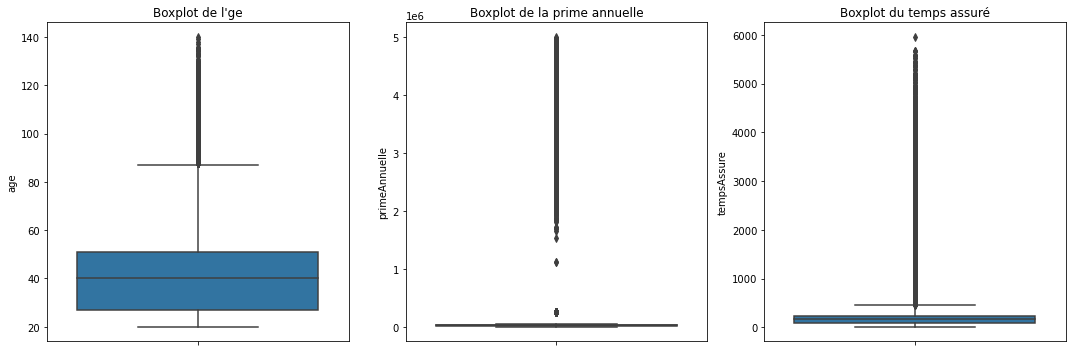

In [ ]:
# vérification de présence de outliers pour les variables numériques
# Boxplots

plt.figure(figsize=(15, 5))  # Adjust figure size as needed

# Boxplot pour 'age'
plt.subplot(1, 3, 1)
sns.boxplot(y='age', data=final_df)
plt.title("Boxplot de l'ge")

# Boxplot pour 'primeAnnuelle'
plt.subplot(1, 3, 2)
sns.boxplot(y='primeAnnuelle', data=final_df)
plt.title('Boxplot de la prime annuelle')

# Boxplot pour 'tempsAssure'
plt.subplot(1, 3, 3)
sns.boxplot(y='tempsAssure', data=final_df)
plt.title('Boxplot du temps assuré')


plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Calcul de la skewness et de la kurtosis pour chaque variable
skewness = final_df[['age', 'primeAnnuelle', 'tempsAssure']].skew()
kurtosis = final_df[['age', 'primeAnnuelle', 'tempsAssure']].kurt()

# Combinaison des résultats dans un DataFrame
skew_kurt_df = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print(skew_kurt_df)


               Skewness   Kurtosis
age            1.275976   2.340002
primeAnnuelle  5.462508  29.202057
tempsAssure    7.029011  57.272537


* Ces résultats suggèrent que les variables primeAnnuelle et tempsAssure présentent des distributions fortement asymétriques avec des queues lourdes, ce qui peut indiquer la présence de valeurs aberrantes ou de segments de clients avec des caractéristiques très différentes.

In [ ]:
# Créer une instance de RobustScaler
scaler = RobustScaler()
df_scaled = final_df

# Sélectionner les colonnes à mettre à l'échelle
columns_to_scale = ['age', 'primeAnnuelle', 'tempsAssure']

# Appliquer la mise à l'échelle aux colonnes sélectionnées
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# Afficher le résumé statistique des variables numériques après la mise à l'échelle
print("\nStatistiques descriptives - Variables numériques après RobustScaler:")
df_scaled.describe()


Statistiques descriptives - Variables numériques après RobustScaler:


,age,permisConduire,dejaAssure,primeAnnuelle,tempsAssure,interesse,genre_Male,ageVehicule_< 1 Year,ageVehicule_> 2 Years,accidentVehicule_Yes,...,canalDistribution_152,canalDistribution_153,canalDistribution_154,canalDistribution_155,canalDistribution_156,canalDistribution_157,canalDistribution_158,canalDistribution_159,canalDistribution_160,canalDistribution_163
count,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,...,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.00000,49996.000000,49996.000000,49996.000000
mean,0.088928,0.822586,0.303584,7.762264,0.419766,0.246300,0.560525,0.345568,0.053924,0.664153,...,0.268842,0.001300,0.022482,0.005640,0.038083,0.026702,0.00186,0.000080,0.043203,0.013001
std,0.747753,0.382023,0.459810,42.626514,2.845506,0.430859,0.496328,0.475558,0.225871,0.472290,...,0.443362,0.036034,0.148246,0.074892,0.191399,0.161213,0.04309,0.008944,0.203317,0.113280
min,-0.833333,0.000000,0.000000,-1.948470,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-0.541667,1.000000,0.000000,-0.512188,-0.503311,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.458333,1.000000,1.000000,0.487812,0.496689,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,4.166667,1.000000,1.000000,336.477157,38.403974,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
### Scaling ( 2eme methode)

In [ ]:
corr_matrix = df_scaled.corr()

In [ ]:
import numpy as np

# Set the correlation threshold
threshold = 0.8

# Find pairs of highly correlated variables
highly_correlated_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print("Highly Correlated Variable Pairs:")
for pair in highly_correlated_pairs:
    print(pair)


Highly Correlated Variable Pairs:
('accidentVehicule_Yes', 'dejaAssure')


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = df_scaled[['age', 'primeAnnuelle', 'tempsAssure']]
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif)

         Feature       VIF
0            age  1.000074
1  primeAnnuelle  1.000008
2    tempsAssure  1.000082


#### Rééquilibrage de la base de données SMOTE

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


# Définition de X et y
X = df_scaled.drop(columns=['interesse'])
y = df_scaled['interesse']

# Vérification de la distribution de y
print('------------Avant SMOTE')
print(y.value_counts())

# La classe 0 est 3 fois plus représenté que la classe 1
# application de smote



smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print('------------Après SMOTE')
print(y_resampled.value_counts())



------------Avant SMOTE
0    37682
1    12314
Name: interesse, dtype: int64
------------Après SMOTE
0    37682
1    37682
Name: interesse, dtype: int64


### Modélisation

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


#### Regression logistique _ modèle1
###### OneHotEncoder ,Robust Scale , SMOTE

When developing and evaluating a Logistic Regression model, it's essential to consider both the underlying assumptions and the performance metrics to ensure the model's validity and effectiveness.

Assumptions of Logistic Regression:

* Independence of Observations: Each data point should be independent of others.


* Linearity of the Logit: There should be a linear relationship between each continuous independent variable and the log-odds of the dependent variable.


* No Multicollinearity: Independent variables should not be highly correlated with each other.


* Absence of Outliers: The model assumes no extreme outliers or influential data points that could disproportionately affect the results.


In [ ]:

logre_model = LogisticRegression(max_iter=10000,random_state=0)
logre_model.fit(X_train, y_train)
y_pred = logre_model.predict(X_test)

#### Evaluation du premier modèle

In [ ]:
print('train score : ' , logre_model.score(X_train, y_train) )
print('test score : ' , logre_model.score(X_test,y_test) )

train score :  0.8442387752732581
test score :  0.8399124261925297


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      7522
           1       0.77      0.96      0.86      7551

    accuracy                           0.84     15073
   macro avg       0.86      0.84      0.84     15073
weighted avg       0.86      0.84      0.84     15073



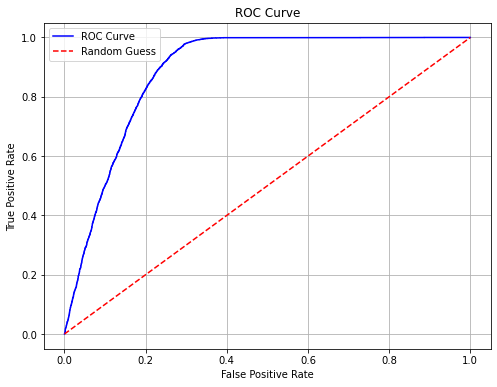

In [ ]:
# ROC Curve
y_scores = logre_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# AUC
# Calcul de l'AUC
auc = roc_auc_score(y_test, y_scores[:, 1])
print(f"AUC : {auc:.2f}")

AUC : 0.88


#### Regression logistique _ modèle2
###### OneHotEncoder ,Robust Scale , SMOTE , feature selection (RFE)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['saga'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [100, 200, 300],
    'tol': [0.0001, 0.001, 0.01]
}

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Set up Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 5 folds for each of 135 candidates, totalling 675 fits


C:\Users\mouss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mouss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mouss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "C:\Users\mouss\anaconda3\lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super(

Best Hyperparameters: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}


C:\Users\mouss\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=9)
rfe.fit(X_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)


C:\Users\mouss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Sélection de variables [False  True  True False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False Fal

In [ ]:
print("Variables sélectionnées :", list(X.columns[rfe.support_]))
y_pred = logre_model.predict(X_test)

Variables sélectionnées : ['permisConduire', 'dejaAssure', 'accidentVehicule_Yes', 'codeRegion_44', 'canalDistribution_16', 'canalDistribution_64', 'canalDistribution_127', 'canalDistribution_135', 'canalDistribution_160']


In [ ]:
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(60291, 9)
(15073, 9)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log = LogisticRegression(random_state=0)
param =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100,1000, 2000, 3000]}

grid = GridSearchCV(log, param_grid=param, cv =5, n_jobs=-1)
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [ ]:
logre_model = LogisticRegression(random_state=0, C=1.414141, penalty = 'l2', solver='liblinear')
logre_model.fit(x_train, y_train)

In [ ]:
#### Evaluation du deuxième modèle

In [ ]:
print('train score : ' , logre_model.score(X_train, y_train) )
print('test score : ' , logre_model.score(X_test,y_test) )

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

In [ ]:
# ROC Curve
y_scores = logre_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# AUC
# Calcul de l'AUC
auc = roc_auc_score(y_test, y_scores[:, 1])
print(f"AUC : {auc:.2f}")

#### RANDOM FOREST

In [ ]:

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)




#### Evaluation du premier modèle de Random Forest

In [ ]:


# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      7522
           1       0.83      0.94      0.88      7551

    accuracy                           0.87     15073
   macro avg       0.88      0.87      0.87     15073
weighted avg       0.88      0.87      0.87     15073



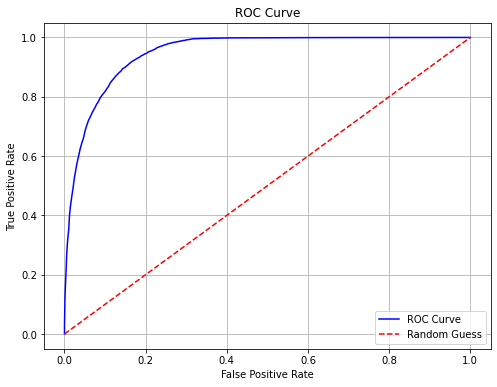

In [ ]:
y_scores = rf_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:

# Calcul de l'AUC
auc = roc_auc_score(y_test, y_scores[:, 1])
print(f"AUC : {auc:.2f}")


AUC : 0.95


#### Optimisation des hyperparamètres pour le modèle Random Forest ( GridSearchCV )


In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 50)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}





In [ ]:
# Hyperparameter Tuning for Random Forest


# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='f1') # Use all available CPU cores

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

NameError: name 'X_train' is not defined

#### Evaluation du premier modèle de Random Forest ( après le tuning)

In [ ]:
# Evaluate the best model
y_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:

y_scores = best_rf_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

In [ ]:

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()



In [ ]:
# Calcul de l'AUC
auc = roc_auc_score(y_test, y_scores[:, 1])
print(f"AUC : {auc:.2f}")

# XGBOOST

In [ ]:
# les noms des caractéristiques après l'encodage one-hot
feature_names = X_train.columns.tolist()

# les caractères invalides dans les noms des caractéristiques
for i, name in enumerate(feature_names):
    feature_names[i] = name.replace('[', '_').replace(']', '_').replace('<', '_')

# les noms des caractéristiques dans le DataFrame
X_train.columns = feature_names
X_test.columns = feature_names


# The XGBoost model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.85      7522
           1       0.81      0.95      0.87      7551

    accuracy                           0.86     15073
   macro avg       0.87      0.86      0.86     15073
weighted avg       0.87      0.86      0.86     15073



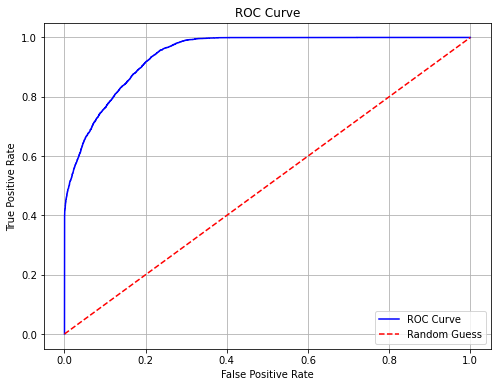

In [ ]:
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Calcul de l'AUC
auc = roc_auc_score(y_test, y_scores[:, 1])
print(f"AUC : {auc:.2f}")

AUC : 0.94
